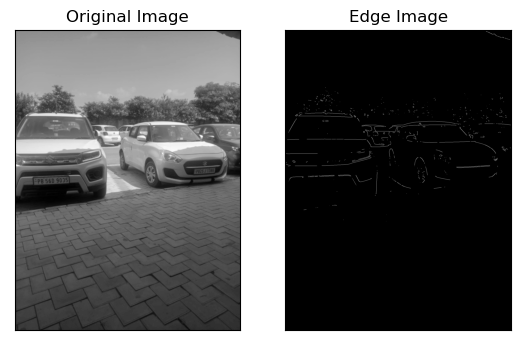

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#loading the image
img = cv.imread('ct_parking.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Noise reduction
img = cv.GaussianBlur(img, (5, 5), 1.4)

# Gradient calculation
gx = cv.Sobel(np.float32(img), cv.CV_64F, 1, 0, 3)
gy = cv.Sobel(np.float32(img), cv.CV_64F, 0, 1, 3)


edges = cv.Canny(img,200,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

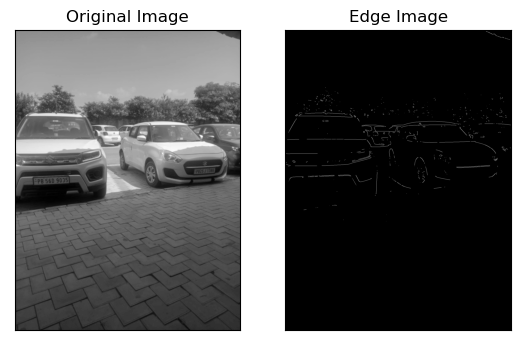

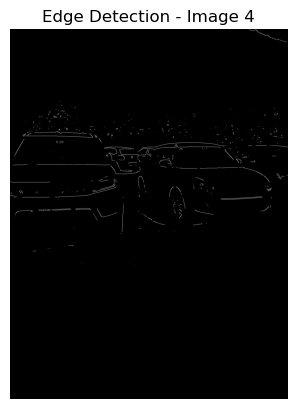

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
    # Step 1: Convert to grayscale
    gray_image = color.rgb2gray(image)
    
    # Step 2: Apply Gaussian Blur for Noise Reduction
    blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)
    
    # Step 3: Calculate Gradients (Sobel Operator)
    gradient_x = ndimage.sobel(blurred, axis=1)
    gradient_y = ndimage.sobel(blurred, axis=0)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    
    # Step 4: Non-Maximum Suppression
    gradient_direction = np.degrees(gradient_direction) % 180  # Convert to degrees
    suppressed = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            if 0 <= direction < 22.5 or 157.5 <= direction < 180:
                if gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]:
                    suppressed[i, j] = gradient_magnitude[i, j]
            # Check other gradient directions and suppress accordingly
            
    # Step 5: Double Threshold and Edge Tracking by Hysteresis
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)
    
    # Edge Tracking by Hysteresis
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    edge_map[strong_edges] = 255
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            if weak_edges[i, j]:
                neighbors = edge_map[i - 1:i + 2, j - 1:j + 2]
                if np.max(neighbors) == 255:
                    edge_map[i, j] = 255
    
    return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1, 5):
    image = io.imread('ct_parking.jpg')  # Load your image here
    # Apply Canny Edge Detection
    edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)
    
    # Display and save the results
    edges = cv.Canny(img,200,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.imshow(edges, cmap='gray')
plt.title(f'Edge Detection - Image {i}')
plt.axis('off')
plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()